In [40]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import seaborn as sns

In [41]:
path_dataset = './Data/Dataset_original.csv'

dataset = pd.read_csv(path_dataset)

In [42]:
print(dataset.shape)
dataset.head()

(29018, 9)


,Application date,Longitude,Latitude,Address,Request category,Application description,Last performer,ID performer,Application status
0,2019-01-01,51.339734,55.417592,"Чистополь — Нижнекамск, Ачи, Нижнекамский райо...",Благоустройство территории,На трассе Нижнекамск-Чистополь в лесополосе у ...,Исполнительный комитет Нижнекамского муниципал...,22291.0,Заявка решена
1,2019-01-01,52.456953,54.603573,"29, Ленинградская улица, городское поселение Л...",Благоустройство территории,Во дворе дома Ленинградская 29 отсутствуют пар...,Исполнительный комитет Лениногорского муниципа...,22281.0,Мот.отказ
2,2019-01-01,49.126253,55.792942,"Россия, Республика Татарстан, Казань, улица Га...",Содержание и ремонт муниципальных дорог,Добрый день! Не осуществляется уборка снега в ...,Администрация Вахитовского и Приволжского райо...,23141.0,Заявка решена
3,2019-01-01,49.077931,55.824431,"Казань, улица Серова, 51/11",Благоустройство территории,Добрый день! Не осуществляется вывоз мусора с ...,Администрация Кировского и Московского района ...,23251.0,Заявка решена
4,2019-01-01,49.195417,55.818761,"3-я Владимирская улица, Царицыно, Советский ра...",Содержание и ремонт муниципальных дорог,на данном участке проезжей части от ул.Халитов...,Администрация Советского района г.Казани,23139.0,Заявка решена


In [43]:
print('Кол-во уникальных классов Категории Обращений: ', len(dataset['Request category'].unique()))
print('Кол-во уникальных классов Последнего Исполнителя:', len(dataset['Last performer'].unique()))

Кол-во уникальных классов Категории Обращений:  37
Кол-во уникальных классов Последнего Исполнителя: 154


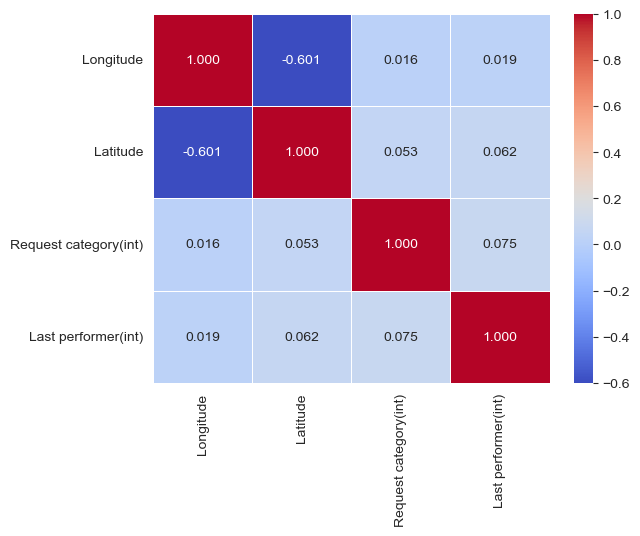

In [44]:
request_category_int = LabelEncoder().fit_transform(dataset['Request category'])
last_performer_int = LabelEncoder().fit_transform(dataset['Last performer'])

temp_df = dataset.loc[:, ['Longitude', 'Latitude']]
temp_df['Request category(int)'] = request_category_int
temp_df['Last performer(int)'] = last_performer_int

sns.heatmap(
    temp_df.corr(), 
    annot=True, 
    linewidths='.5', 
    cmap='coolwarm', 
    fmt='.3f'
);

In [45]:
columns_for_drop = {'Application date', 'Longitude', 'Latitude', 'Address', 'ID performer', 'Application status'}

if columns_for_drop.issubset(dataset.columns):
    dataset.drop(columns_for_drop, axis=1, inplace=True)

In [46]:
dataset.drop_duplicates(inplace=True)
assert not dataset.duplicated().any(), 'The dataset has completely duplicate rows!'

In [47]:
dataset.dropna(axis=0, inplace=True)
assert not dataset.isna().any().any(), 'The dataset has missing values!'

In [48]:
counts_request_category = dataset['Request category'].value_counts()
indexes_to_remove_req_cat = counts_request_category[counts_request_category < 10].index
dataset = dataset[~dataset['Request category'].isin(indexes_to_remove_req_cat)]

In [49]:
counts_last_performer = dataset['Last performer'].value_counts()
indexes_to_remove_last_perf = counts_last_performer[counts_last_performer < 20].index
dataset = dataset[~dataset['Last performer'].isin(indexes_to_remove_last_perf)]

In [50]:
dataset.shape

(24514, 3)

In [51]:
path_cleaned_dataset = './Data/Dataset_cleaned.csv'
dataset.to_csv(path_cleaned_dataset, index=False)